# Analyze Neural Net Model

General Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

Local Imports

In [4]:
from model import FullyConnectedNet
from TrainValidTest import TrainValidNeuralNet

In [5]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

## Load Data

In [6]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()
# choose the training and test datasets
train_data = torchvision.datasets.MNIST(root='../data', train=True,
                               download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='../data', train=False,
                              download=True, transform=transform)
# prepare data loaders
train_loader = torch.utils.data.DataLoader( train_data, batch_size=batch_size, 
                            num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                            num_workers=num_workers)

In [7]:
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

## Create a Neural Net Model

In [8]:
%reload_ext autoreload
from model import FullyConnectedNet
from TrainValidTest import TrainValidNeuralNet

In [9]:
# initialize the NN
model = FullyConnectedNet()
print(model)

FullyConnectedNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## Train & Evaluate Neural Network

In [11]:
epoch_train_losses, epoch_eval_losses = [], []
epoch_train_losses, epoch_eval_losses = TrainValidNeuralNet(model, train_loader, valid_loader, 30)

Epoch: 1/30..  Avg. Training Loss: 1.898..  Avg. Validation Loss: 0.752.. 
Epoch: 2/30..  Avg. Training Loss: 0.530..  Avg. Validation Loss: 0.357.. 
Epoch: 3/30..  Avg. Training Loss: 0.301..  Avg. Validation Loss: 0.231.. 
Epoch: 4/30..  Avg. Training Loss: 0.205..  Avg. Validation Loss: 0.169.. 
Epoch: 5/30..  Avg. Training Loss: 0.154..  Avg. Validation Loss: 0.141.. 
Epoch: 6/30..  Avg. Training Loss: 0.121..  Avg. Validation Loss: 0.118.. 
Epoch: 7/30..  Avg. Training Loss: 0.099..  Avg. Validation Loss: 0.113.. 
Epoch: 8/30..  Avg. Training Loss: 0.081..  Avg. Validation Loss: 0.107.. 
Epoch: 9/30..  Avg. Training Loss: 0.069..  Avg. Validation Loss: 0.101.. 
Epoch: 10/30..  Avg. Training Loss: 0.058..  Avg. Validation Loss: 0.101.. 
Epoch: 11/30..  Avg. Training Loss: 0.048..  Avg. Validation Loss: 0.102.. 
Epoch: 12/30..  Avg. Training Loss: 0.040..  Avg. Validation Loss: 0.106.. 
Epoch: 13/30..  Avg. Training Loss: 0.033..  Avg. Validation Loss: 0.093.. 
Epoch: 14/30..  Avg. 

__Save de Model__

In [14]:
torch.save(model.state_dict(), 'model.pt')

## Plot Training and Validation Loss

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

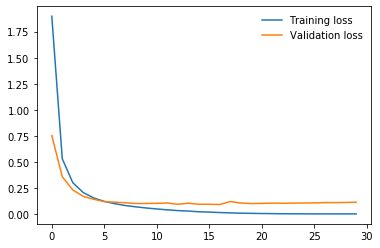

In [15]:
plt.plot(epoch_train_losses, label='Training loss')
plt.plot(epoch_eval_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

## Batch Details for Loss Computation

Train loader Nro. batches

In [102]:
Batches = len(train_loader)
Batches

2400

In [26]:
len(train_loader.sampler)

48000

Nro_train_samples = Batches * batch_size
Nro_train_samples = 2400

In [25]:
Nro_train_samples = Batches * batch_size
Nro_train_samples

48000

In [36]:
dataiter = iter(train_loader)
batch_data, labels = dataiter.next()

In [37]:
batch_data.size()

torch.Size([20, 1, 28, 28])

In [38]:
batch_data.size(0)

20

In [39]:
len(train_loader.dataset)

60000

In [103]:
Validation_Batches = len(valid_loader)
Validation_Batches

600